In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from scipy import stats
import math
%matplotlib inline

# Kmeans

C’est l’algorithme de Forgy/Lloyd qui correspond exactement à la procédure kmeans vue en cours. 
=> KMeans : The k-means problem is solved using either Lloyd’s or Elkan’s algorithm.

In [2]:
df = pd.read_csv('iris.csv', dtype={'Species':'category'}, index_col=0)
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [68]:
def afficher_kmeans(k):
    kmeans = KMeans(n_clusters = k, verbose=0).fit(df.drop('Species', axis=1))
    df_tmp = pd.DataFrame({'cluster':kmeans.labels_})
    df_tmp = pd.concat([df,df_tmp], axis=1)
    sns.scatterplot(x='Sepal.Length', y='Sepal.Width', hue='cluster',data=df_tmp, legend = False);

In [15]:
#sns.scatterplot(x='Sepal.Length', y='Sepal.Width', hue='')
df_tmp = pd.DataFrame({'cluster':kmeans.labels_})
df_tmp = pd.concat([df,df_tmp], axis=1)

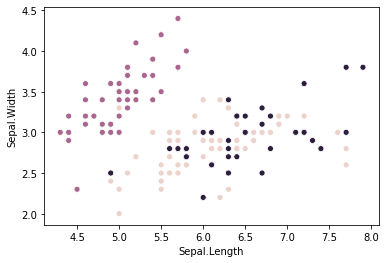

In [23]:
sns.scatterplot(x='Sepal.Length', y='Sepal.Width', hue='cluster',data=df_tmp, legend = False);

## 1er exemple

In [52]:
def create_samp(n, p, mu, xi): 
    Z = stats.norm.rvs(size=2*n, loc=0, scale=1)
    Z = np.reshape(Z, (-1,2))
    mu = np.array(mu).T
    
    xi =[math.sqrt(x) for x in xi]
    M = np.random.multinomial(1, p, n).T #(3,500)

    xi_k = np.reshape(np.dot(xi, M), (-1,1)) #(500,1)
    mu_k = np.dot(mu, M) #(500,2)
    X = mu_k.T + xi_k*Z
    
    cluster = np.dot(np.array([1,2,3]),M)
    return pd.DataFrame({'X1':X[:,0], 'X2':X[:,1], 'cluster': cluster})

In [53]:
X = create_samp(n=500, p=[1/10, 1/2, 2/5], mu=[(0,0), (-5,5), (4,3)], xi=[1,1.5, 2])

''

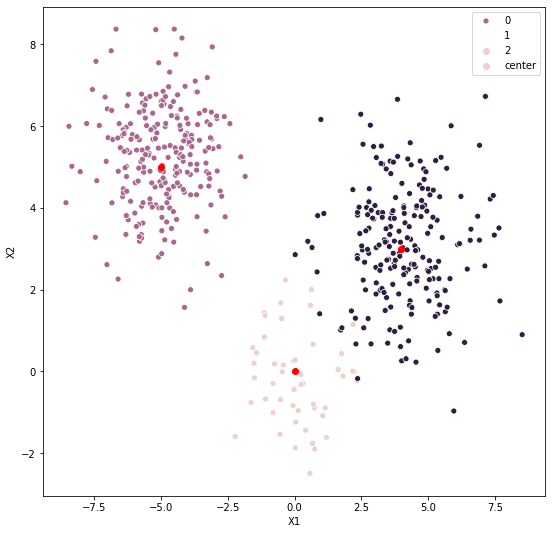

In [66]:
fig, ax = plt.subplots(figsize=(9,9))
fig = sns.scatterplot(x='X1', y='X2', hue='cluster', data= X)
plt.scatter(x=0, y=0, color='r' )
plt.scatter(x=-5, y=5, color='r' )
plt.scatter(x=4, y=3, color='r' )
plt.legend(['0', '1', '2', 'center'])
;

''

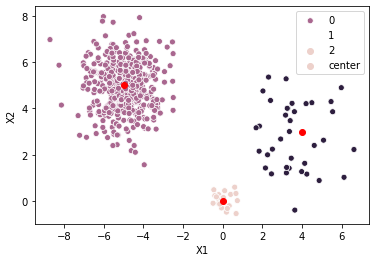

In [83]:
X = create_samp(n=500, p=[1/20, 9/10, 1/20], mu=[(0,0), (-5,5), (4,3)], xi=[0.1,1, 2])
fig = sns.scatterplot(x='X1', y='X2', hue='cluster', data= X)
plt.scatter(x=0, y=0, color='r' )
plt.scatter(x=-5, y=5, color='r' )
plt.scatter(x=4, y=3, color='r' )
plt.legend(['0', '1', '2', 'center'])
;

## 2 Clustering Iris

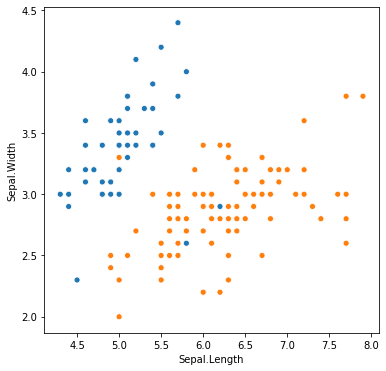

In [76]:
#K=2
fig, ax = plt.subplots(figsize=(6,6))
afficher_kmeans(2)

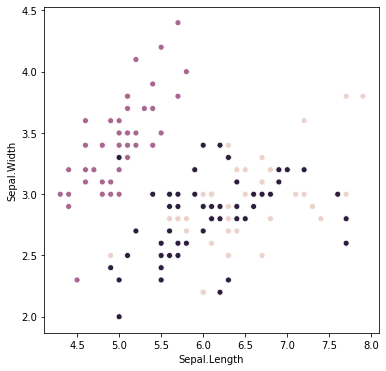

In [77]:
fig, ax = plt.subplots(figsize=(6,6))
afficher_kmeans(3)

Matrice de confusion (=tableau contingence est/vrai)

In [103]:
#K=2
kmeans = KMeans(n_clusters = 2, verbose=0).fit(df.drop('Species', axis=1))
df_tmp = pd.DataFrame({'cluster':kmeans.labels_})
df_tmp= df_tmp.set_index(np.arange(1,151,1))
df_tmp = pd.concat([df,df_tmp], axis=1)
pd.crosstab(df_tmp['Species'], df_tmp['cluster'])

cluster,0,1
Species,,
setosa,0,50
versicolor,47,3
virginica,50,0


In [104]:
#K=3
kmeans = KMeans(n_clusters = 3, verbose=0).fit(df.drop('Species', axis=1))
df_tmp = pd.DataFrame({'cluster':kmeans.labels_})
df_tmp= df_tmp.set_index(np.arange(1,151,1))
df_tmp = pd.concat([df,df_tmp], axis=1)
pd.crosstab(df_tmp['Species'], df_tmp['cluster'])

cluster,0,1,2
Species,,,
setosa,0,50,0
versicolor,48,0,2
virginica,14,0,36


Clustering basé uniquement sur les mesures des pétales, puis des sépales.
Comparer avec les résultats précédents.

**Sans les sépales**

In [106]:
kmeans = KMeans(n_clusters = 3, verbose=0).fit(df.drop(['Sepal.Length', 'Sepal.Width', 'Species'], axis=1))
df_tmp = pd.DataFrame({'cluster':kmeans.labels_})
df_tmp= df_tmp.set_index(np.arange(1,151,1))
df_tmp = pd.concat([df,df_tmp], axis=1)
pd.crosstab(df_tmp['Species'], df_tmp['cluster'])

cluster,0,1,2
Species,,,
setosa,50,0,0
versicolor,0,2,48
virginica,0,46,4


Etonnament on obtient de meilleurs résultats ! Le fait d'avoir uniquement deux variables permet de davantage discriminer les espèces

**Sans les pétales**

In [108]:
kmeans = KMeans(n_clusters = 3, verbose=0).fit(df.drop(['Petal.Length', 'Petal.Width', 'Species'], axis=1))
df_tmp = pd.DataFrame({'cluster':kmeans.labels_})
df_tmp= df_tmp.set_index(np.arange(1,151,1))
df_tmp = pd.concat([df,df_tmp], axis=1)
pd.crosstab(df_tmp['Species'], df_tmp['cluster'])

cluster,0,1,2
Species,,,
setosa,0,0,50
versicolor,12,38,0
virginica,35,15,0


En revanche, c'est pas terrible pour les sépales uniquement !

## 3 Choix du nombre de groupes

In [125]:
l = (kmeans.cluster_centers_-1)**2 #(3,2)
np.amin(l)

2.864396582413671

In [128]:
kmeans.cluster_centers_.shape

(3, 2)

In [155]:
def select_dist(x, kmeans):
    return np.amin((kmeans.cluster_centers_-np.array(x).reshape(-1,2))**2)

dist = []
for count, k in enumerate(range(1,6)):
    kmeans = KMeans(n_clusters = k, verbose=0).fit(df.drop(['Sepal.Length', 'Sepal.Width', 'Species'], axis=1))
    tmp = df.drop(['Sepal.Length', 'Sepal.Width', 'Species'], axis=1).apply(lambda x : select_dist(x, kmeans),axis=1)
    tmp = np.mean(tmp)
    dist.append(tmp)

''

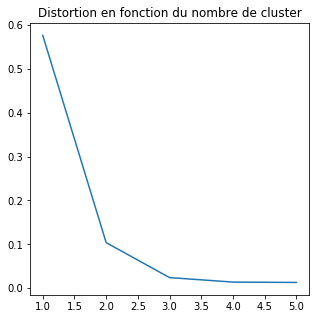

In [166]:
fig, ax = plt.subplots(figsize=(5,5))
fig = plt.plot(range(1,6), dist)
ax.set_title('Distortion en fonction du nombre de cluster')
;

On aurait pu utiliser la méthode kmeans.intertia pour trouver tout de suite !

## 4 Données simulées en pagaille

**Losange**

In [196]:
df_losange = pd.read_csv('losanges.txt', header=0, sep=' ')
df_losange.head(n=3) #(1000, 2)

,V1,V2
1,-0.036800,-0.409668
2,0.100512,0.857833
3,0.791452,-0.598717


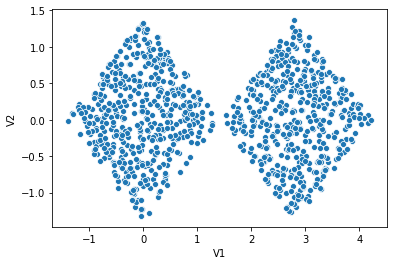

In [184]:
sns.scatterplot(x='V1', y='V2', data=df_losange);

In [234]:
def afficher_kmeans(k, data):
    kmeans = KMeans(n_clusters = k).fit(data)
    df_tmp = pd.DataFrame({'cluster':kmeans.labels_})
    df_tmp = df_tmp.set_index(np.arange(1,len(df_tmp)+1, 1))
    df_tmp = pd.concat([data,df_tmp], axis=1)
    sns.scatterplot(x=df_tmp.columns[0], y=df_tmp.columns[1], hue=df_tmp.columns[2], data= df_tmp, legend = False);

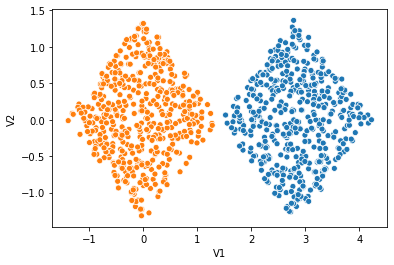

In [241]:
afficher_kmeans(2,df_losange)

**Noeuds**

In [243]:
df_noeud = pd.read_csv('noeud.txt', header=0, sep=' ')
df_noeud.head(n=3) #(1000, 2)

,V1,V2
1,-0.686611,-0.658874
2,-0.379532,-0.916869
3,-0.040666,0.088004


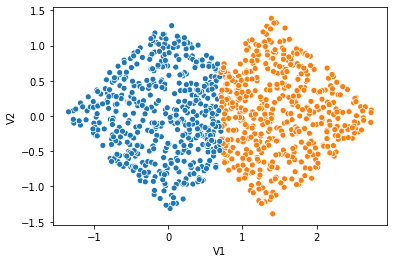

In [245]:
afficher_kmeans(2,df_noeud)

**Paquets**

In [246]:
df_paquets = pd.read_csv('paquets.txt', header=0, sep=' ')
df_paquets.head(n=3) #(1000, 2)

,V1,V2
1,1.103368,3.497388
2,1.442754,3.724637
3,1.661325,9.483442


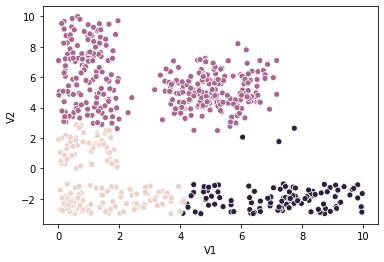

In [250]:
afficher_kmeans(3,df_paquets)

On s'aperçoit que la forme des données est particulière et notre algorithme ne performe pas très bien. Notre algorithme considère uniquement les Gaussiennnes en formes elliptiques.

**Note** :
L'algorithme Kmeans est plus rapide qu'un algorithme de mélange Gaussien

**Rectexp**

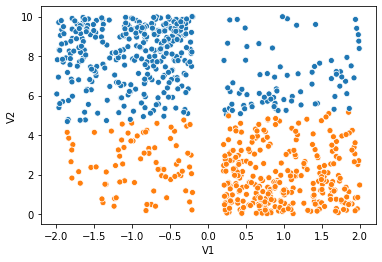

In [254]:
df_rectexp = pd.read_csv('rectexp.txt', header=0, sep=' ')
afficher_kmeans(2,df_rectexp)

A nouveau notre algorithme performe mal ! 